# Micro-Credit Defaulter Model
### Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low-income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not many sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans, and so on.

Many microfinance institutions (MFI), experts, and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost-saving, than the traditional high-touch model used for long for the purpose of delivering microfinance services. Though the MFI industry is primarily focusing on low-income families and is very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed their business and organization based on the budget operator model, offering better products at Lower Prices to all value-conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low-income families and poor customers that can help them in the need of the hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be a defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For a loan amount of 5 (in Indonesian Rupiah), the payback amount should be 6 (in Indonesian Rupiah), while, for a loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


# Importing required liabraries

In [1]:
# Importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Data and Coverting to DataFrame

In [2]:
df = pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
# Number of Rows and columns in our dataset
df.shape

(209593, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64


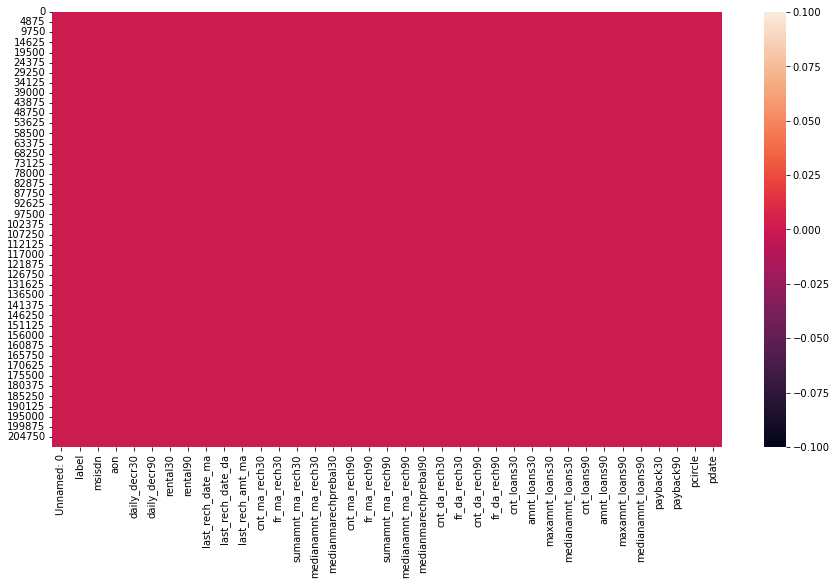

In [5]:
print(df.isna().sum())
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()

In [6]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Checking unique values of each column
Marking as Mardown as it takes too much space.

for i in df.columns:
    print(df[i].value_counts())
    print('======================================')

In [7]:
# Checking Duplicate values
df.duplicated().sum()

0

There are no duplicate values in our dataset.

### Zero % in our Features

In [8]:
# Checking '0' in columns/features
Zero_value = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
Zero_value.columns=['Count of Zero values']
Zero_value['% of Zero values']=Zero_value['Count of Zero values']/2095.93
Zero_value

,Count of Zero values,% of Zero values
fr_da_rech90,208728,99.587295
fr_da_rech30,208014,99.246635
cnt_da_rech30,205479,98.037148
cnt_da_rech90,204226,97.439323
last_rech_date_da,202861,96.788061
medianamnt_loans90,197424,94.193985
medianamnt_loans30,195445,93.249775
payback30,106712,50.913914
payback90,95699,45.659445
fr_ma_rech30,78683,37.540853


In [9]:
print ('Name of Columns','\n','\n', df.columns)

Name of Columns 
 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')


Observation
We need to remove below columns. I have described detailed reason along with column name for the reason they need to be removemd from our dataset.
1. pcircle - It has only one value'UPW' in it. It wont affect our data, so this can be removed.
2. Unnamed:0 - It is just index number, we can remove this. It wont affect our data.
3. fr_da_rech90 - It has more than 99% 0 values. Which is not very much, so we can remove this from our dataset.
4. fr_da_rech30 - Similart to above it has more than 99% of 0 values.
5. cnt_da_rech30 - It has more than 98% 0 values.
6. cnt_da_rech90 - It has more than 97% 0 values.
7. last_rech_date_da - It has more than 96% 0 values.
8. medianamnt_loans90 - It has more than 94% 0 values.
9. medianamnt_loans30 - It has more than 93% 0 values.

In [10]:
# Removing above mentioned 9 columns.

# dropping columns having more than 90% of zero values
df.drop(columns=['pcircle', 'Unnamed: 0', 'fr_da_rech90', 'fr_da_rech30', 'cnt_da_rech30', 'cnt_da_rech90',
                'last_rech_date_da', 'medianamnt_loans90', 'medianamnt_loans30', 'msisdn'],axis=1,inplace=True)

In [11]:
# Checking columns
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pdate'],
      dtype='object')

### Description of above columns

- **label** - Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	
- **msisdn** - 	mobile number of user	
- **aon** -	age on cellular network in days	
- **daily_decr30** - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	
- **daily_decr90** - 	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	
- **rental30** - Average main account balance over last 30 days	
- **rental90** - Average main account balance over last 90 days	
- **last_rech_date_ma**	Number of days till last recharge of main account	
- **last_rech_amt_ma**	Amount of last recharge of main account (in Indonesian Rupiah)	
- **cnt_ma_rech30**	Number of times main account got recharged in last 30 days	
- **fr_ma_rech30**	Frequency of main account recharged in last 30 days
- **sumamnt_ma_rech30**	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
- **medianamnt_ma_rech30**	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
- **medianmarechprebal30**	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
- **cnt_ma_rech90**	Number of times main account got recharged in last 90 days	
- **fr_ma_rech90**	Frequency of main account recharged in last 90 days
- **sumamnt_ma_rech90**	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
- **medianamnt_ma_rech90**	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
- **medianmarechprebal90**	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
- **cnt_loans30**	Number of loans taken by user in last 30 days	
- **amnt_loans30**	Total amount of loans taken by user in last 30 days	
- **maxamnt_loans30**	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
- **medianamnt_loans30**	Median of amounts of loan taken by the user in last 30 days	
- **cnt_loans90**	Number of loans taken by user in last 90 days	
- **amnt_loans90**	Total amount of loans taken by user in last 90 days	
- **maxamnt_loans90**	maximum amount of loan taken by the user in last 90 days	
- **medianamnt_loans90**	Median of amounts of loan taken by the user in last 90 days	
- **payback30**	Average payback time in days over last 30 days	
- **payback90**	Average payback time in days over last 90 days	
- **pdate	date** - Date

Dividing 'Pdate' column to Day, Month and Year.

In [12]:
# converting 'pdate' column from object to datetime
df.pdate = pd.to_datetime(df.pdate)

# Taking Day from 'pdate'
df["Day"] = df["pdate"].dt.day

# Taking Month from 'pdate'
df["Month"] = df["pdate"].dt.month

# Taking year from 'pdate'
df["Year"] = df["pdate"].dt.year

As we extrated Day, Month and Year from 'pdate' column we will remove that from our dataframe also as year is same so we can also remove that.

In [13]:
# Dropping 'pdate' and 'Year' column from our dataframe
df.drop(columns=['pdate', 'Year'],axis=1,inplace=True)

As per commnets section for column **'maxamnt_loans30'** There are only two options 5 and 10 Rs. for which the user needs to pay back 6 & 12 Rs. respectively. Also there are some entries with zero so we will convert other entries to 0.

In [14]:
# Checking rows other than 0, 6 and 12.
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

There are 1047 rows values other than 6, 12 and 0 we will replace these with 0.

In [15]:
# Converting entries to 0.
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30'] = 0.0

In [16]:
# Checking if values are converted to 0.
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Further to this there are some negative values in some columns which we need to convert to positive.

In [17]:
# Changing negative values to positive
df["aon"] = abs(df["aon"])
df["daily_decr30"] = abs(df["daily_decr30"])
df["daily_decr90"] = abs(df["daily_decr90"])
df["rental30"] = abs(df["rental30"])
df["rental90"] = abs(df["rental90"])
df["last_rech_date_ma"] = abs(df["last_rech_date_ma"])
df["medianmarechprebal30"] = abs(df["medianmarechprebal30"])
df["medianmarechprebal90"] = abs(df["medianmarechprebal90"])

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.0,1.000000,1.000000,1.00,1.000000
aon,209593.0,8112.808718,75696.032666,1.0,246.000000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.431293,9220.606472,0.0,42.453000,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.544140,10918.796572,0.0,42.693333,1500.000000,7802.79,320630.000000
rental30,209593.0,2715.376558,4294.257439,0.0,299.700000,1095.750000,3362.35,198926.110000
rental90,209593.0,3509.497148,5754.630600,0.0,330.000000,1347.220000,4204.51,200148.110000
last_rech_date_ma,209593.0,3756.125844,53905.872857,0.0,1.000000,3.000000,7.00,998650.377733
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.0,770.000000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.0,1.000000,3.000000,5.00,203.000000
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.0,0.000000,2.000000,6.00,999606.368132


### Observation

- Dataset looks great and has no erroneous values since we properly transformed the negative values.

- There are no missing values in the dataset since all of the columns have the same counts.

- Except for the target column label, which has a mean value slightly below median and is therefore skewed to the left, all of the characteristics have mean values that are larger than the median (50%) and hence all of the features are skewed to the right.

- I can see from the data summary that there is a significant discrepancy between the maximum value and the 75% percentile, which results in a significant number of outliers in the dataset.

- We can see from the summary above that the typical label value is 0.873948. 

# Exploratory Data Analysis

## Univariate Analysis

1    183431
0     26162
Name: label, dtype: int64


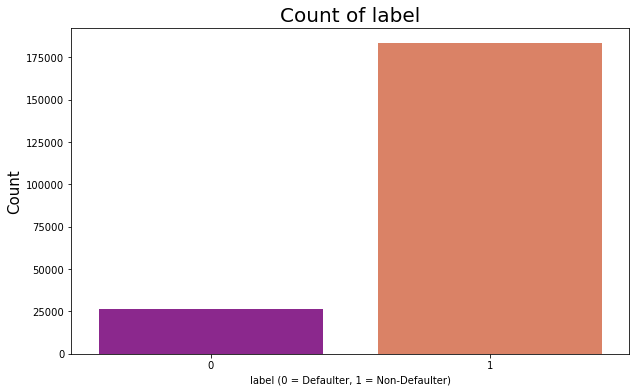

In [19]:
# Count of Label
print (df['label'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x='label', data=df, palette = 'plasma')
plt.title('Count of label', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('label (0 = Defaulter, 1 = Non-Defaulter)')
plt.show()

- Based on the above plots, we can see that 87% of the loans were paid in full by the user, while just 13% of them were not.
- Additionally, the dataset is rather unbalanced, therefore we need to address that issue otherwise our model would be biassed more in favour of success and provide incorrect results. 

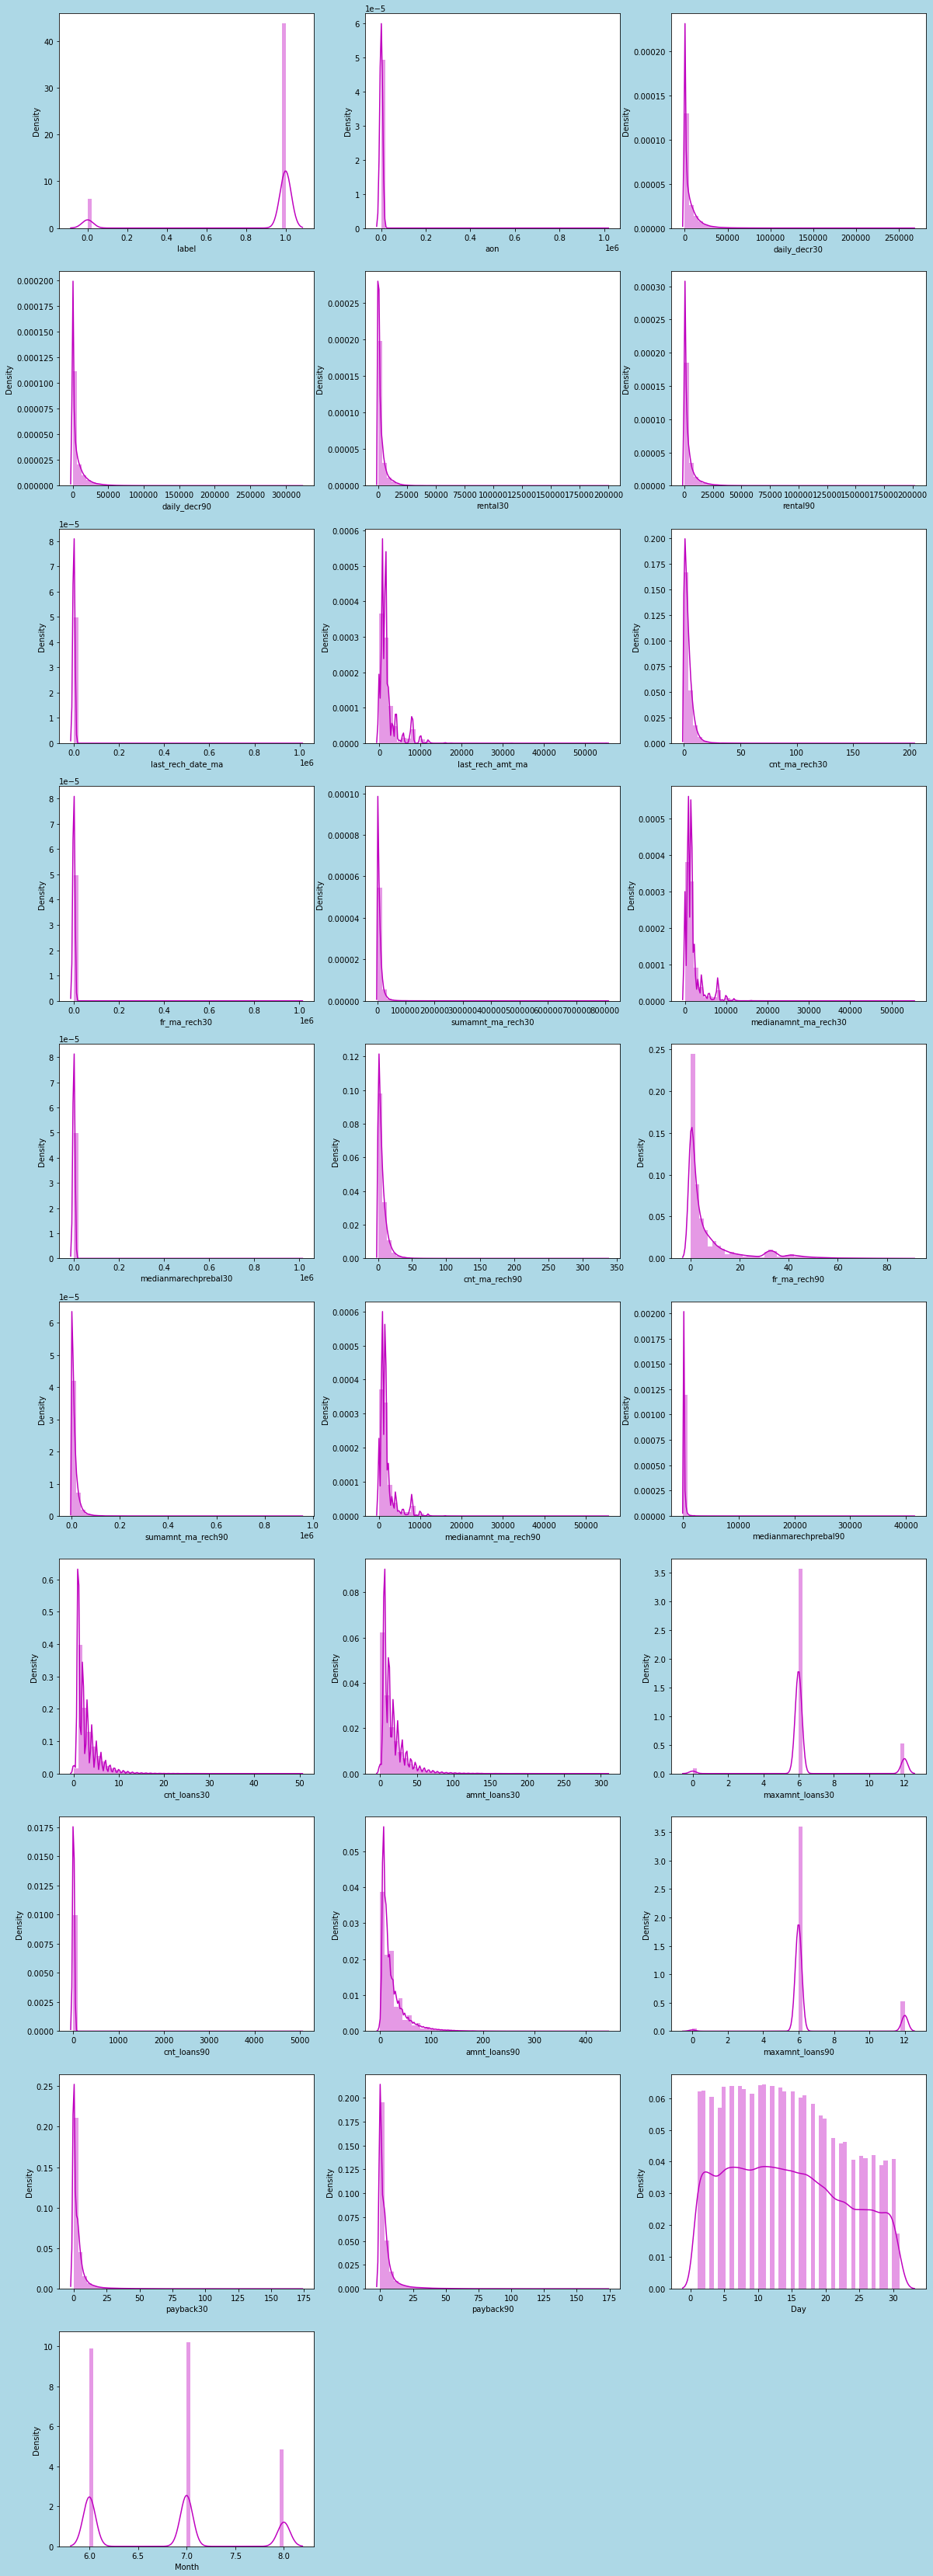

In [20]:
# ploting for numerical columns only
plt.figure(figsize = (20,60), facecolor = 'lightblue')
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(10,3,i[0]+1)
    sns.distplot(df[i[1]],color='m')
plt.show()

- We can see from the distribution map above that the most of the columns are not normally distributed, with the exception of the Day column, which is relatively normal.
- We need to reduce this skewness before creating our machine learning models since all the columns are skewed to the right and have a mean that is higher than the median.

# Bivariate Analysis

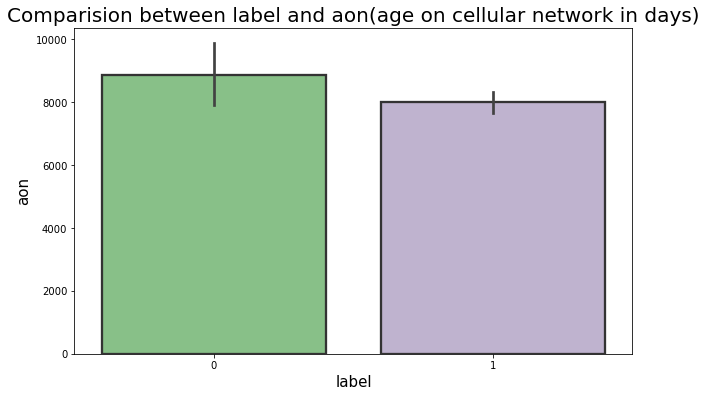

In [21]:
# Comparision between label and aon
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['aon'],data=df,palette="Accent",linewidth=2.3,edgecolor=".2")
plt.title('Comparision between label and aon(age on cellular network in days)', fontsize = 20)
plt.ylabel('aon',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

The above bar plot shows that the defaulter rate is greater where cellular network user ages in days are higher, with around 8871 counts (in days)

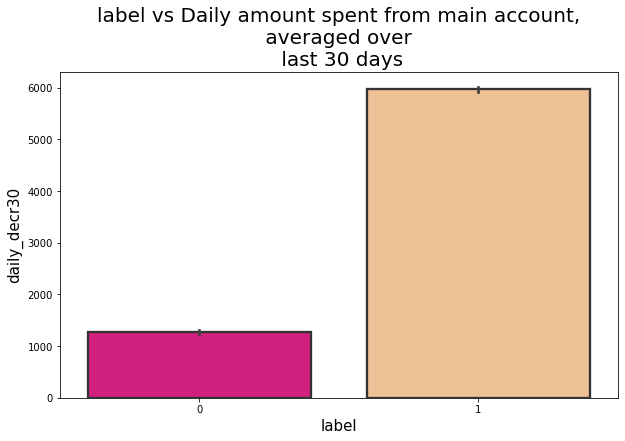

In [22]:
# Comparision of label with daily_decr30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['daily_decr30'],data=df,palette="Accent_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs Daily amount spent from main account,\n averaged over \n last 30 days', fontsize = 20)
plt.ylabel('daily_decr30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

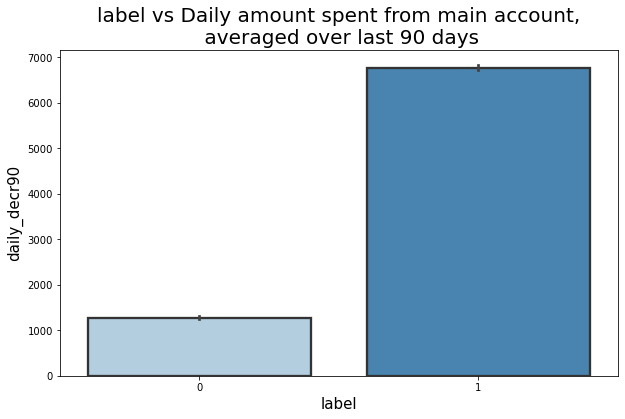

In [23]:
# Comparision of label with daily_decr90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['daily_decr90'],data=df,palette="Blues",linewidth=2.3,edgecolor=".2")
plt.title('label vs Daily amount spent from main account,\n averaged over last 90 days', fontsize = 20)
plt.ylabel('daily_decr90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- The majority of customers that returned the credit balance within 5 days after loan issuance have high rates of daily account activity over the past 30 and 90 days, with counts of roughly 5940 and 6732, respectively.
- Around 0.6% of customers who have spent money from their primary account on a daily basis over the past 30 and 90 days have always paid back their loans in full within 5 days.

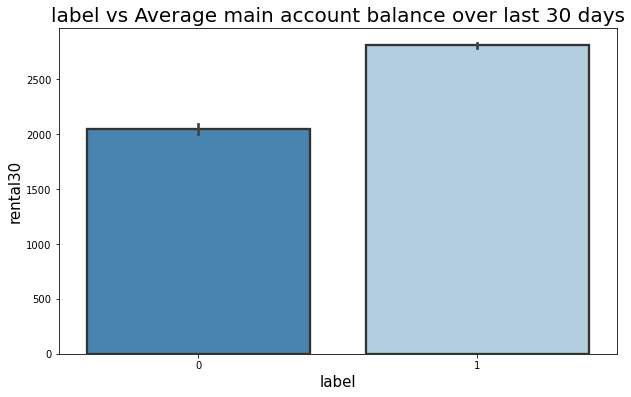

In [24]:
# Comparision of label with rental30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['rental30'],data=df,palette="Blues_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs Average main account balance over last 30 days', fontsize = 20)
plt.ylabel('rental30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

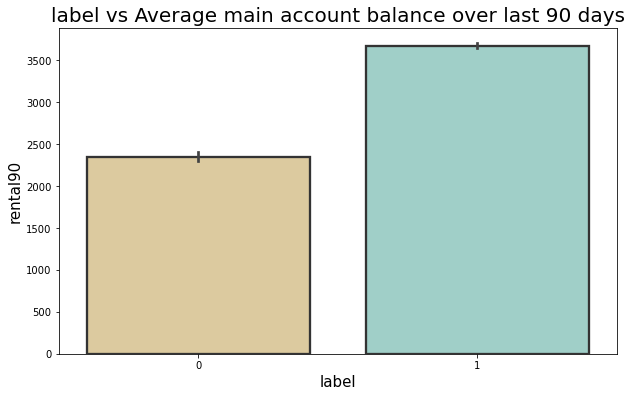

In [25]:
# Comparision of label with rental90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['rental90'],data=df,palette="BrBG",linewidth=2.3,edgecolor=".2")
plt.title('label vs Average main account balance over last 90 days', fontsize = 20)
plt.ylabel('rental90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- In comparison to defaulters, non-defaulter users had an average primary account balance over the previous 30 and 90 days of roughly 2790 and 3640 respectively.

- This indicates that customers with average primary account balances always repay credit amounts within 5 days, whereas 1% of users either failed to repay the loan amount on time or are not making loan payments. 

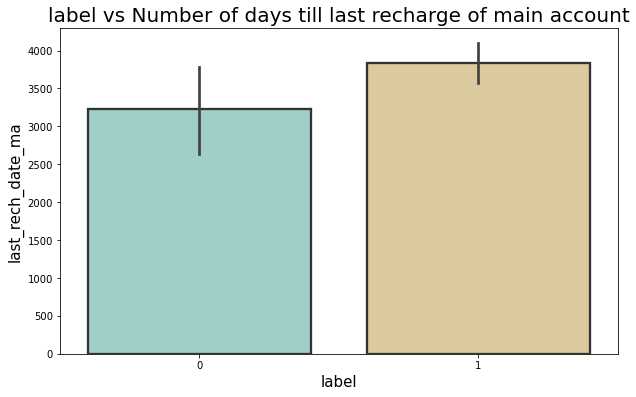

In [26]:
# Comparision on label with last_reach_date_ma
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['last_rech_date_ma'],data=df,palette="BrBG_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs Number of days till last recharge of main account', fontsize = 20)
plt.ylabel('last_rech_date_ma',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

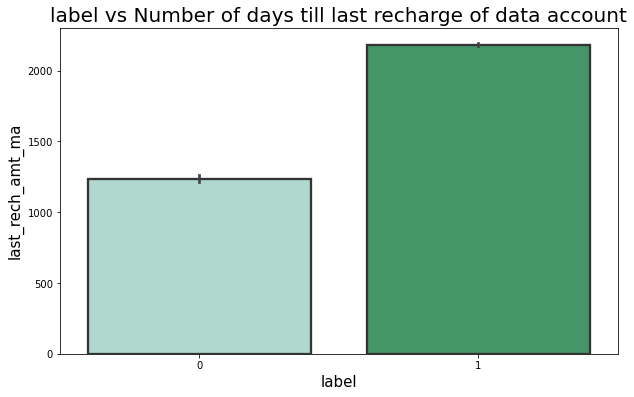

In [27]:
# Comparison of label with last_reach_amt_ma
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['last_rech_amt_ma'],data=df,palette="BuGn",linewidth=2.3,edgecolor=".2")
plt.title('label vs Number of days till last recharge of data account', fontsize = 20)
plt.ylabel('last_rech_amt_ma',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- The individuals who have timely recharged their primary accounts are more likely to repay their loan within the allotted five days. Additionally, several customers who did not repay their loan within 5 days promptly recharged their primary accounts.
- Looking at the last rech amt ma graphic above, we may infer that a higher proportion of borrowers will repay their loans if the primary account's most recent recharge was around 2000.

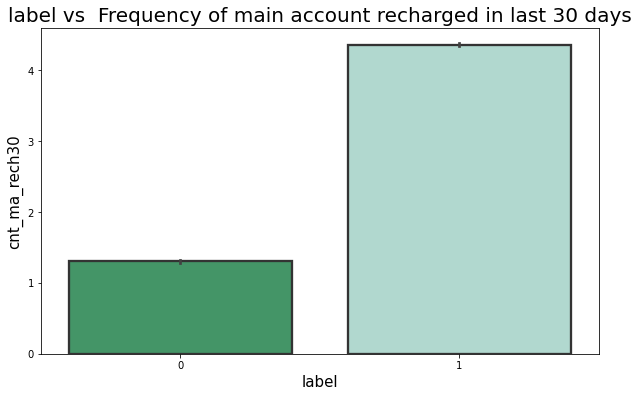

In [28]:
# Comparision of label with cnt_ma_reach30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['cnt_ma_rech30'],data=df,palette="BuGn_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs  Frequency of main account recharged in last 30 days', fontsize = 20)
plt.ylabel('cnt_ma_rech30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

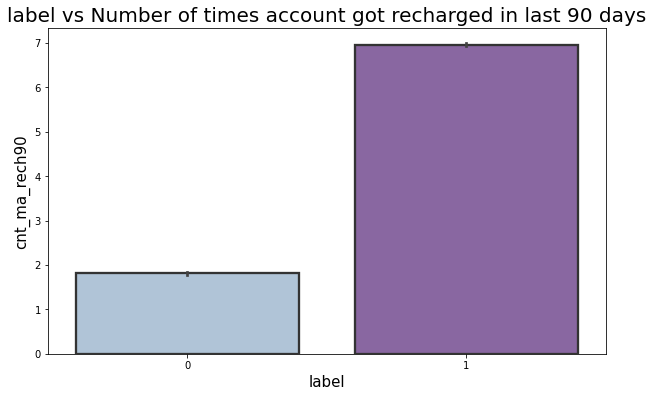

In [29]:
# Comparting label with cnt_ma_rech90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['cnt_ma_rech90'],data=df,palette="BuPu",linewidth=2.3,edgecolor=".2")
plt.title('label vs Number of times account got recharged in last 90 days', fontsize = 20)
plt.ylabel('cnt_ma_rech90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- In the past 30 days, non-defaulters received more than four recharges on their main account, whereas defaulters only received one.
- Customers who paid back their loans within five days received up to seven recharges to their main accounts in the previous ninety days, whereas users who did not get their loans by the due date received two recharges to their main accounts during the same period.
- According to both plots, customers who had their primary account recharged a maximum of two times were better able to repay their loan in full within five days than those who had their main account refilled less frequently.

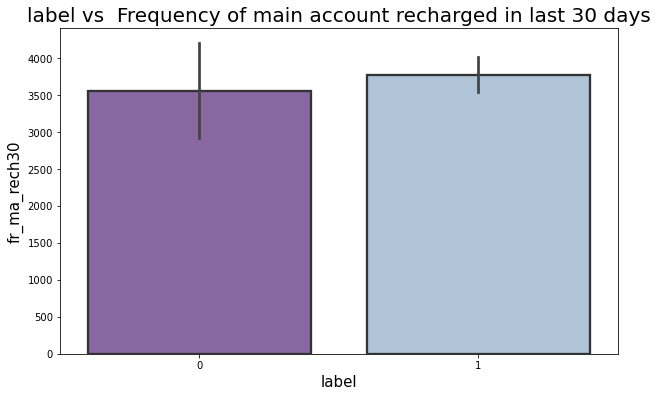

In [30]:
# Comparing label with fr_ma_rech30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['fr_ma_rech30'],data=df,palette="BuPu_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs  Frequency of main account recharged in last 30 days', fontsize = 20)
plt.ylabel('fr_ma_rech30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

In terms of how frequently the primary account has been recharged over the past 30 days, the number of defaulters and non-defaulters is essentially equal. They did not repay the money in the allotted five days. This indicates that it isn't making a bigger contribution to prediction.

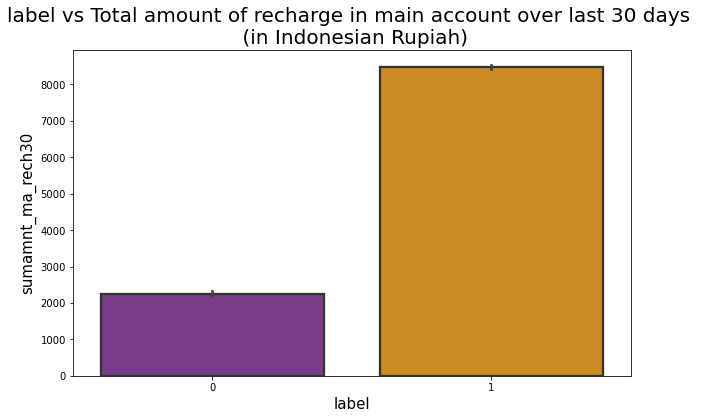

In [31]:
# Comparing label with sumamnt_ma_rech30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['sumamnt_ma_rech30'],data=df,palette="CMRmap",linewidth=2.3,edgecolor=".2")
plt.title('label vs Total amount of recharge in main account over last 30 days \n (in Indonesian Rupiah)', fontsize = 20)
plt.ylabel('sumamnt_ma_rech30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

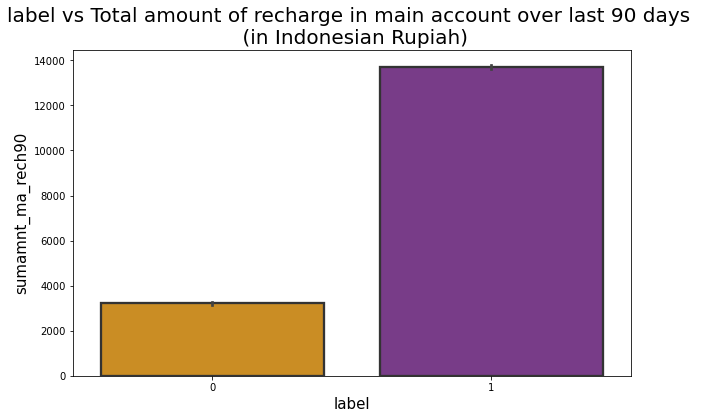

In [32]:
# Comparing label with sumamnt_ma_rech90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['sumamnt_ma_rech90'],data=df,palette="CMRmap_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs Total amount of recharge in main account over last 90 days \n (in Indonesian Rupiah)', fontsize = 20)
plt.ylabel('sumamnt_ma_rech90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- The individuals who didn't pay back the loan within 5 days have had about 2000–2400 less recharges in their primary account during the past 30 days (in Indonesian Rupiah). Additionally, those who paid off their loans in less than five days have recharged their primary accounts with more than 8000 (in Indonesian Rupiah) during the past thirty days.
- Users who paid off their loan balance within five days had a total recharge in their primary account of roughly 13,700 Indonesian Rupiah over the previous ninety days, whereas defaulters had a total recharge of only 3,200 Indonesian Rupiah over the previous ninety days.

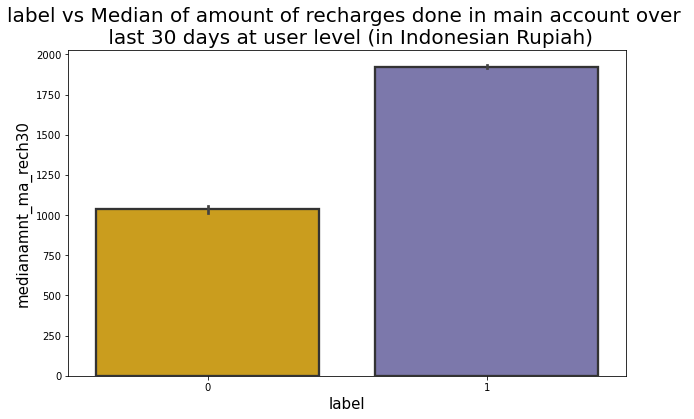

In [33]:
# Comparing label with medianamnt_ma_rech30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['medianamnt_ma_rech30'],data=df,palette="Dark2_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs Median of amount of recharges done in main account over \n last 30 days at user level (in Indonesian Rupiah)', fontsize = 20)
plt.ylabel('medianamnt_ma_rech30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

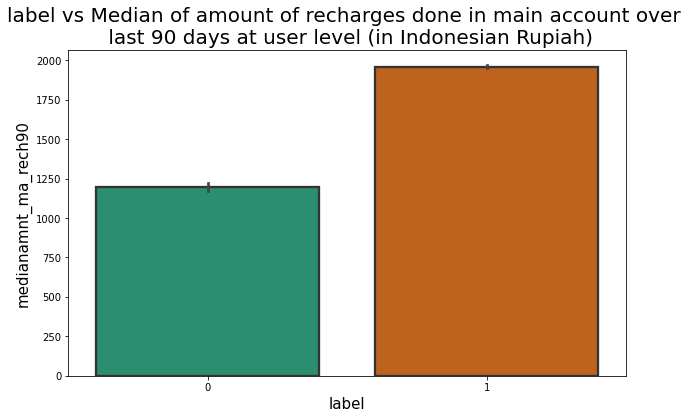

In [34]:
# Comparing label with medianamnt_ma_reach90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['medianamnt_ma_rech90'],data=df,palette="Dark2",linewidth=2.3,edgecolor=".2")
plt.title('label vs Median of amount of recharges done in main account over \n last 90 days at user level (in Indonesian Rupiah)', fontsize = 20)
plt.ylabel('medianamnt_ma_rech90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- Users who have recharged their primary accounts with a median value of 1920 Indonesian Rupiah over the past 30 days have successfully repaid their credit amount within 5 days of receiving the loan, however users who have recharged with a smaller amount—1036—have not been able to do so.
- Similar to the statistics for the previous 30 days, consumers who have made a median recharge of 1950 in their primary account during the past 90 days have paid back their credit amount within 5 days, whereas users who have made a median loan payment of 1198 have not.

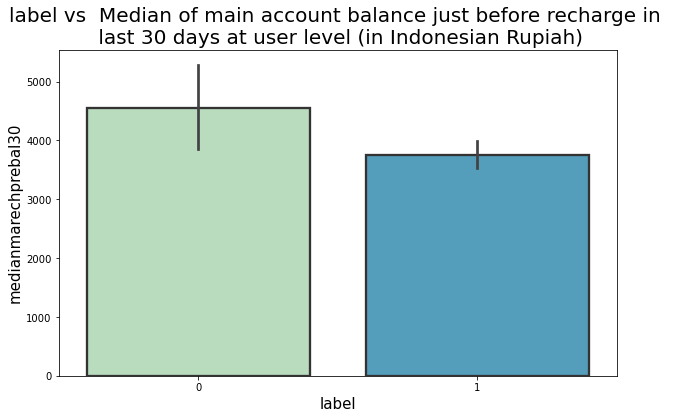

In [35]:
# Comparing label with medianmarechprebal30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['medianmarechprebal30'],data=df,palette="GnBu",linewidth=2.3,edgecolor=".2")
plt.title('label vs  Median of main account balance just before recharge in \n last 30 days at user level (in Indonesian Rupiah)', fontsize = 20)
plt.ylabel('medianmarechprebal30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

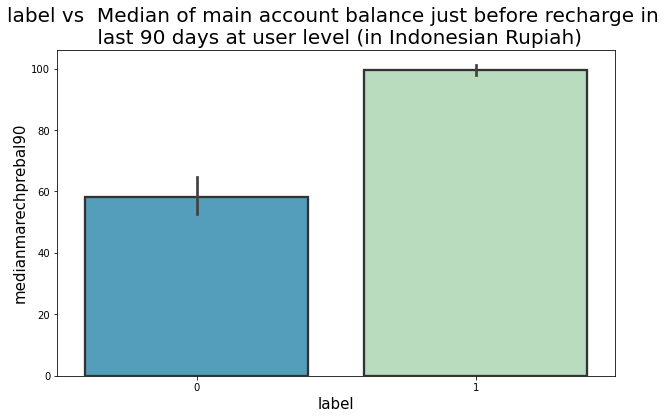

In [36]:
# Comparing label with medianmarechprebal90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['medianmarechprebal90'],data=df,palette="GnBu_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs  Median of main account balance just before recharge in \n last 90 days at user level (in Indonesian Rupiah)', fontsize = 20)
plt.ylabel('medianmarechprebal90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- According to 30 days of data, defaulters' median main account balances are around 4500 (Indonesian Rupiah), which is higher than it is for non-defaulters. This means that, at the user level, the median main account balance has increased just before recharge in the past 30 days, increasing the likelihood that the user will be a defaulter.
- The median main account value at the user level increased immediately before recharging in the last 90 days, boosting the likelihood of being a non-defaulter. In the past 90 days, the median main account balance for non-defaulters was roughly 100 (Indonesian Rupiah), which is high compared to defaulters.

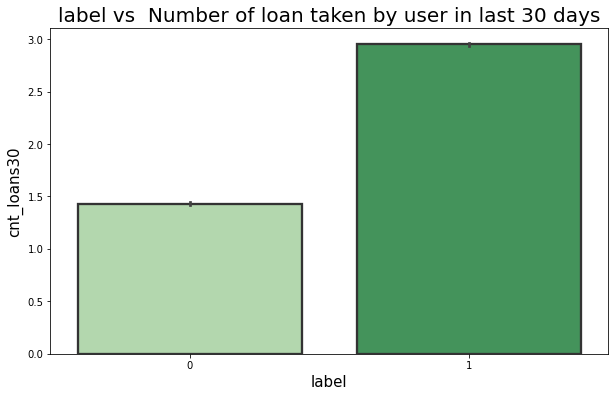

In [37]:
# Comparing label with cnt_loans30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['cnt_loans30'],data=df,palette="Greens",linewidth=2.3,edgecolor=".2")
plt.title('label vs  Number of loan taken by user in last 30 days', fontsize = 20)
plt.ylabel('cnt_loans30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

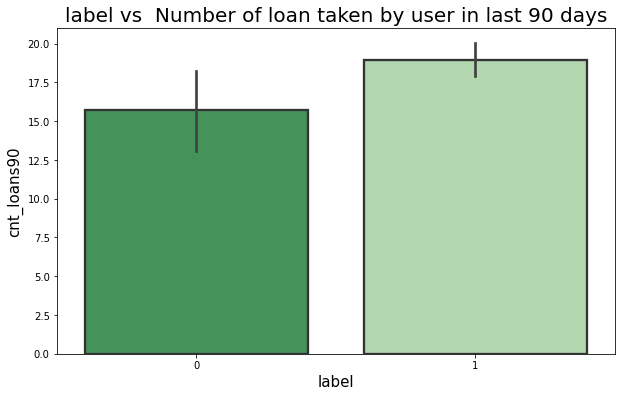

In [38]:
# Comparing label with cnt_loans90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['cnt_loans90'],data=df,palette="Greens_r",linewidth=2.3,edgecolor=".2")
plt.title('label vs  Number of loan taken by user in last 90 days', fontsize = 20)
plt.ylabel('cnt_loans90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- Defaulters have taken 1 loan in the past 30 days, meaning that they have a greater probability of not repaying the credit amount if they take out a loan just once in that time frame. Users who have paid back their loans have taken a maximum of 3 loans in the past 30 days, according to the data.
- When compared to the previous 30 days' data, the number of loans taken by defaulters has increased significantly during the past 90 days, which also raises the likelihood that they would also default.

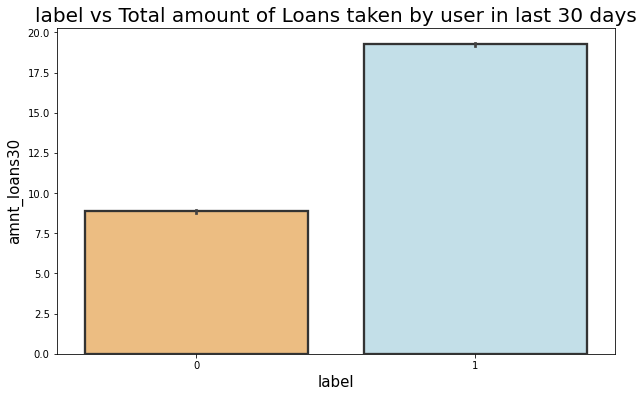

In [39]:
# Comparing label with amnt_loans30
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['amnt_loans30'],data=df,palette="RdYlBu",linewidth=2.3,edgecolor=".2")
plt.title('label vs Total amount of Loans taken by user in last 30 days', fontsize = 20)
plt.ylabel('amnt_loans30',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

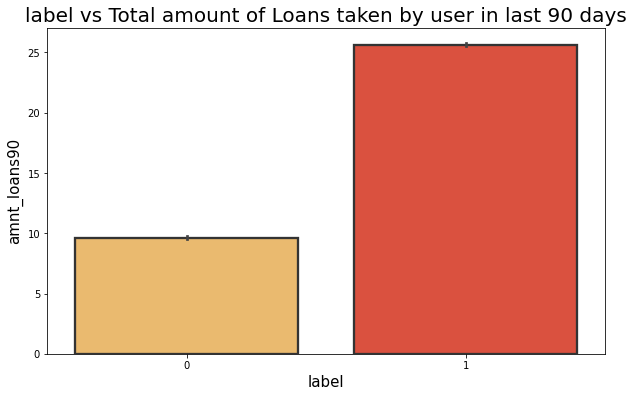

In [40]:
# Comparing label with amnt_loans90
plt.figure(figsize = (10,6))
sns.barplot(df['label'],df['amnt_loans90'],data=df,palette="YlOrRd",linewidth=2.3,edgecolor=".2")
plt.title('label vs Total amount of Loans taken by user in last 90 days', fontsize = 20)
plt.ylabel('amnt_loans90',fontsize=15)
plt.xlabel('label',fontsize=15)
plt.show()

- While non-defaulters have taken up to 20 loans in the previous 30 days, defaulters have taken a total of 7.5 to 10 loans during that time.
- The overall number of loans taken in the previous 90 days by defaulters is up to 10, while the total number of loans taken in the same period by non-defaulters is up to 26.
- The likelihood of defaulting on a loan is therefore high when the total number of loans taken by users over the course of the previous 90 days is less than 10.

Text(0.5, 1.0, 'Label vs Day')

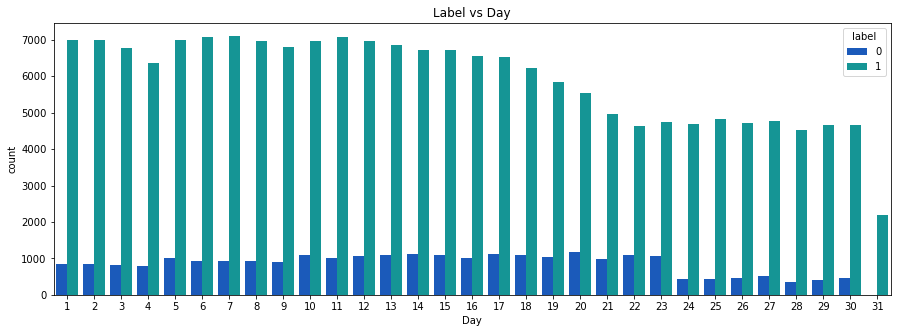

In [41]:
# comparing label with DAY
plt.figure(figsize=(15,5))
sns.countplot(x=df['Day'],hue=df['label'],linewidth=2.3,palette="winter")
plt.title('Label vs Day')



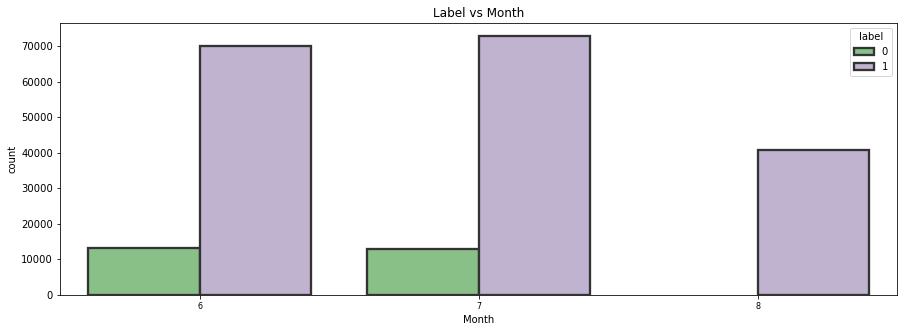

In [42]:
# comparing label with Month
plt.figure(figsize=(15,5))
sns.countplot(x=df['Month'],hue=df['label'],linewidth=2.3,edgecolor=".2",palette="Accent")
plt.title('Label vs Month')
plt.xticks(fontsize='8')
plt.show()

Users who took out loans throughout the month of August appear to be repaying them within 5 days. 

## Dealing Outliers

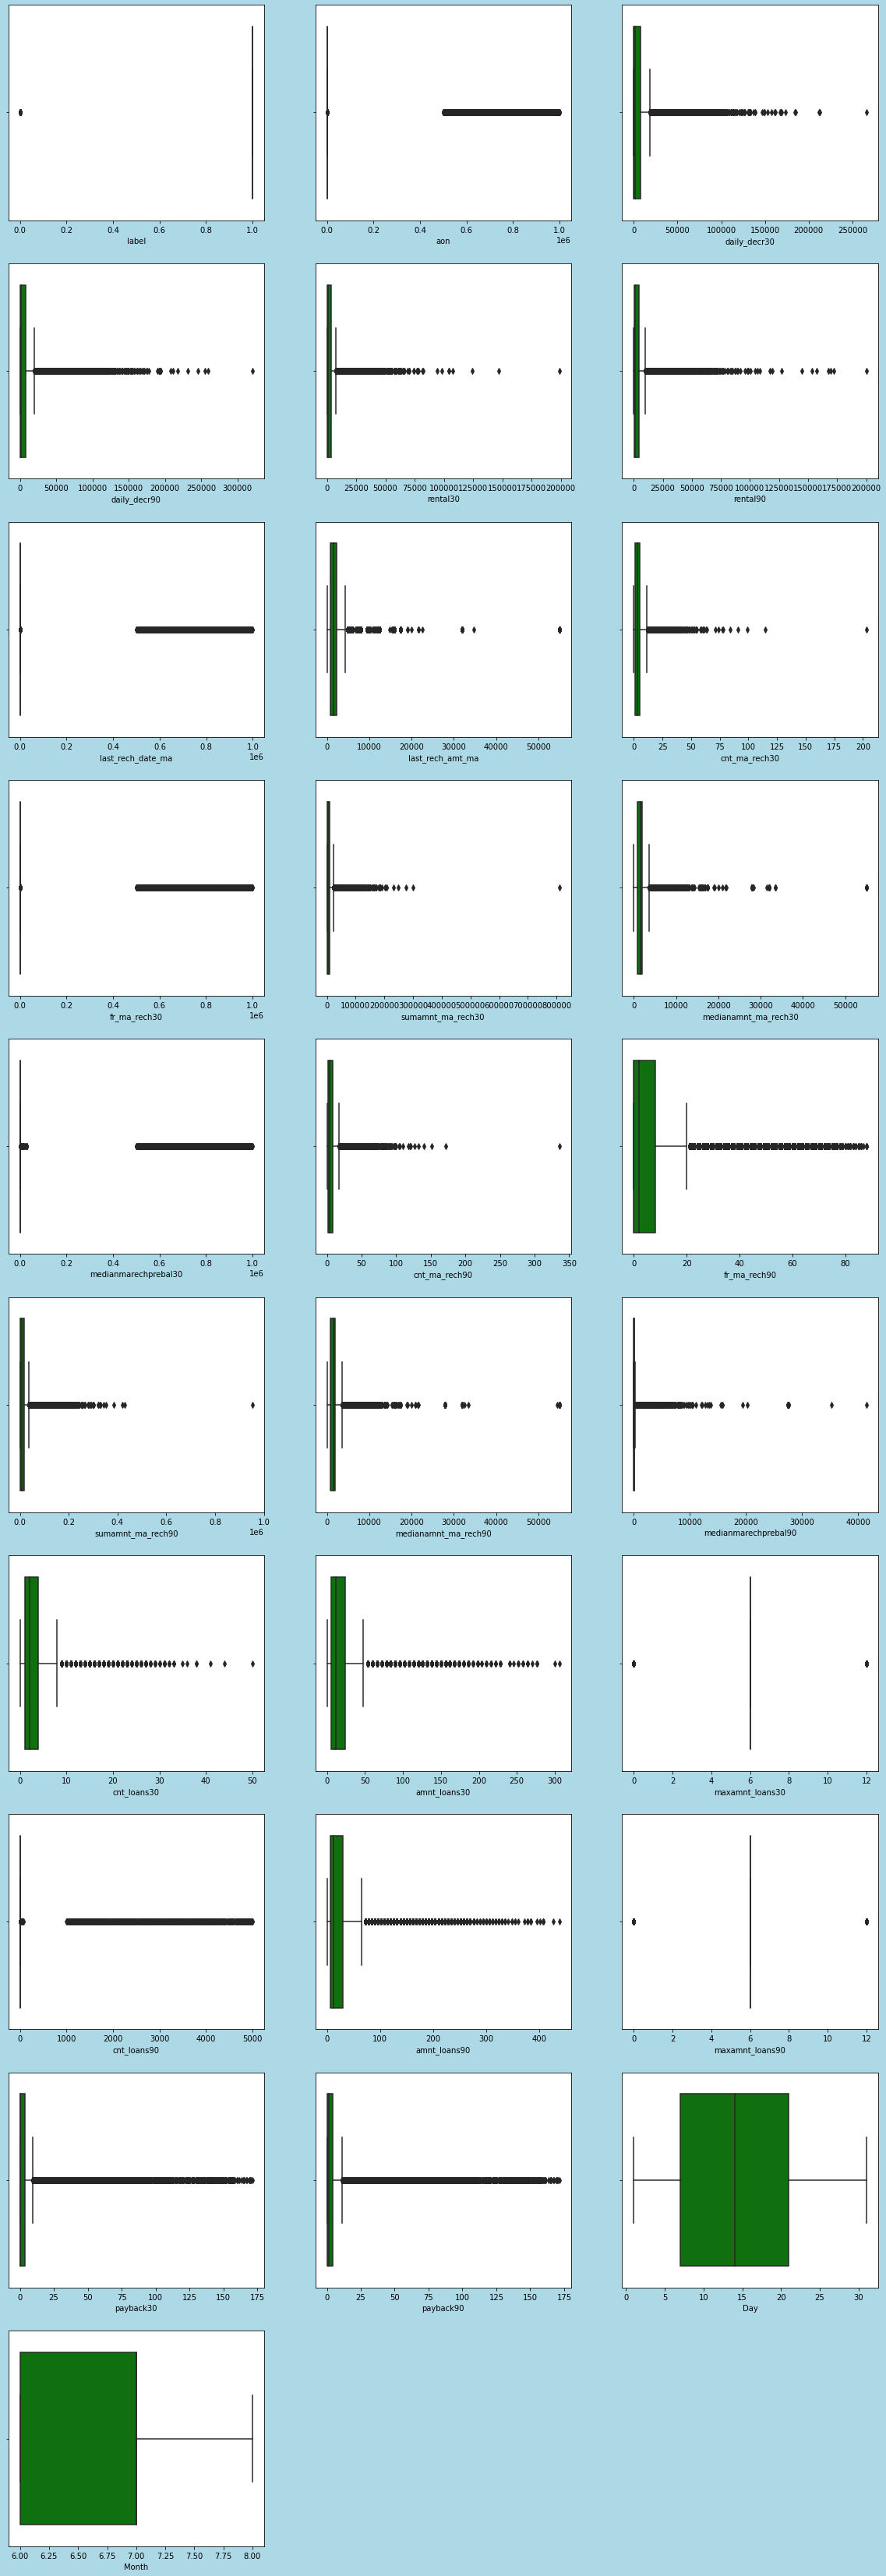

In [43]:
# ploting for numerical columns only
plt.figure(figsize = (20,60), facecolor = 'lightblue')
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(df[i[1]],color='g')
plt.show()

With the exception of the Day and Month columns, all of the features in the boxplot shown above include outliers.

Except for Day, Month, and label, let's delete the outliers from these columns. Since label is our goal column, eliminating outliers from this column shouldn't result in any data loss.

In [44]:
# Feature containing outliers
features = df[['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90',  'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30',  'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90',  'payback30',
       'payback90']]

### Removing outliers

In [45]:
# removing outliers using percentile method
for col in features:
    if df[col].dtypes  != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

We have removed skewness using Percentile Method.

## Checking Skewness

In [46]:
df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974398
daily_decr90            2.091663
rental30                2.115274
rental90                2.203455
last_rech_date_ma       2.541537
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       1.750999
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.812125
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.639138
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         1.241879
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
Day                     0.199845
Month                   0.343242
dtype: float64

The skewness is still present in all of the columns above, with the exception of Day and Month.

There is no need to eliminate skewness in this column because label is our goal variable. Let's use the power transformation approach to eliminate the columns with skewness greater than +/- 0.5. (yeo-johnson method)

In [47]:
# removing skewness using yeo-johnson method to get better prediction
features = ['aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90',  'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30',  'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90',  'payback30',
       'payback90']

from sklearn.preprocessing  import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''

parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\n\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [48]:
df[features] = scaler.fit_transform(df[features].values)

In [49]:
# checking skewness after using yeo-johnson
df[features].skew()

aon                    -0.059160
daily_decr30           -0.141351
daily_decr90           -0.130982
rental30               -0.063274
rental90               -0.063135
last_rech_date_ma       0.044329
last_rech_amt_ma       -0.096659
cnt_ma_rech30          -0.010127
fr_ma_rech30            0.133182
sumamnt_ma_rech30      -0.369884
medianamnt_ma_rech30   -0.239052
medianmarechprebal30   -0.045899
cnt_ma_rech90          -0.012068
fr_ma_rech90            0.140655
sumamnt_ma_rech90      -0.265438
medianamnt_ma_rech90   -0.100228
medianmarechprebal90   -0.029268
cnt_loans30             0.042626
amnt_loans30            0.006048
maxamnt_loans30         0.422682
cnt_loans90             0.206928
amnt_loans90            0.133935
maxamnt_loans90         2.241299
payback30               0.287988
payback90               0.201580
dtype: float64

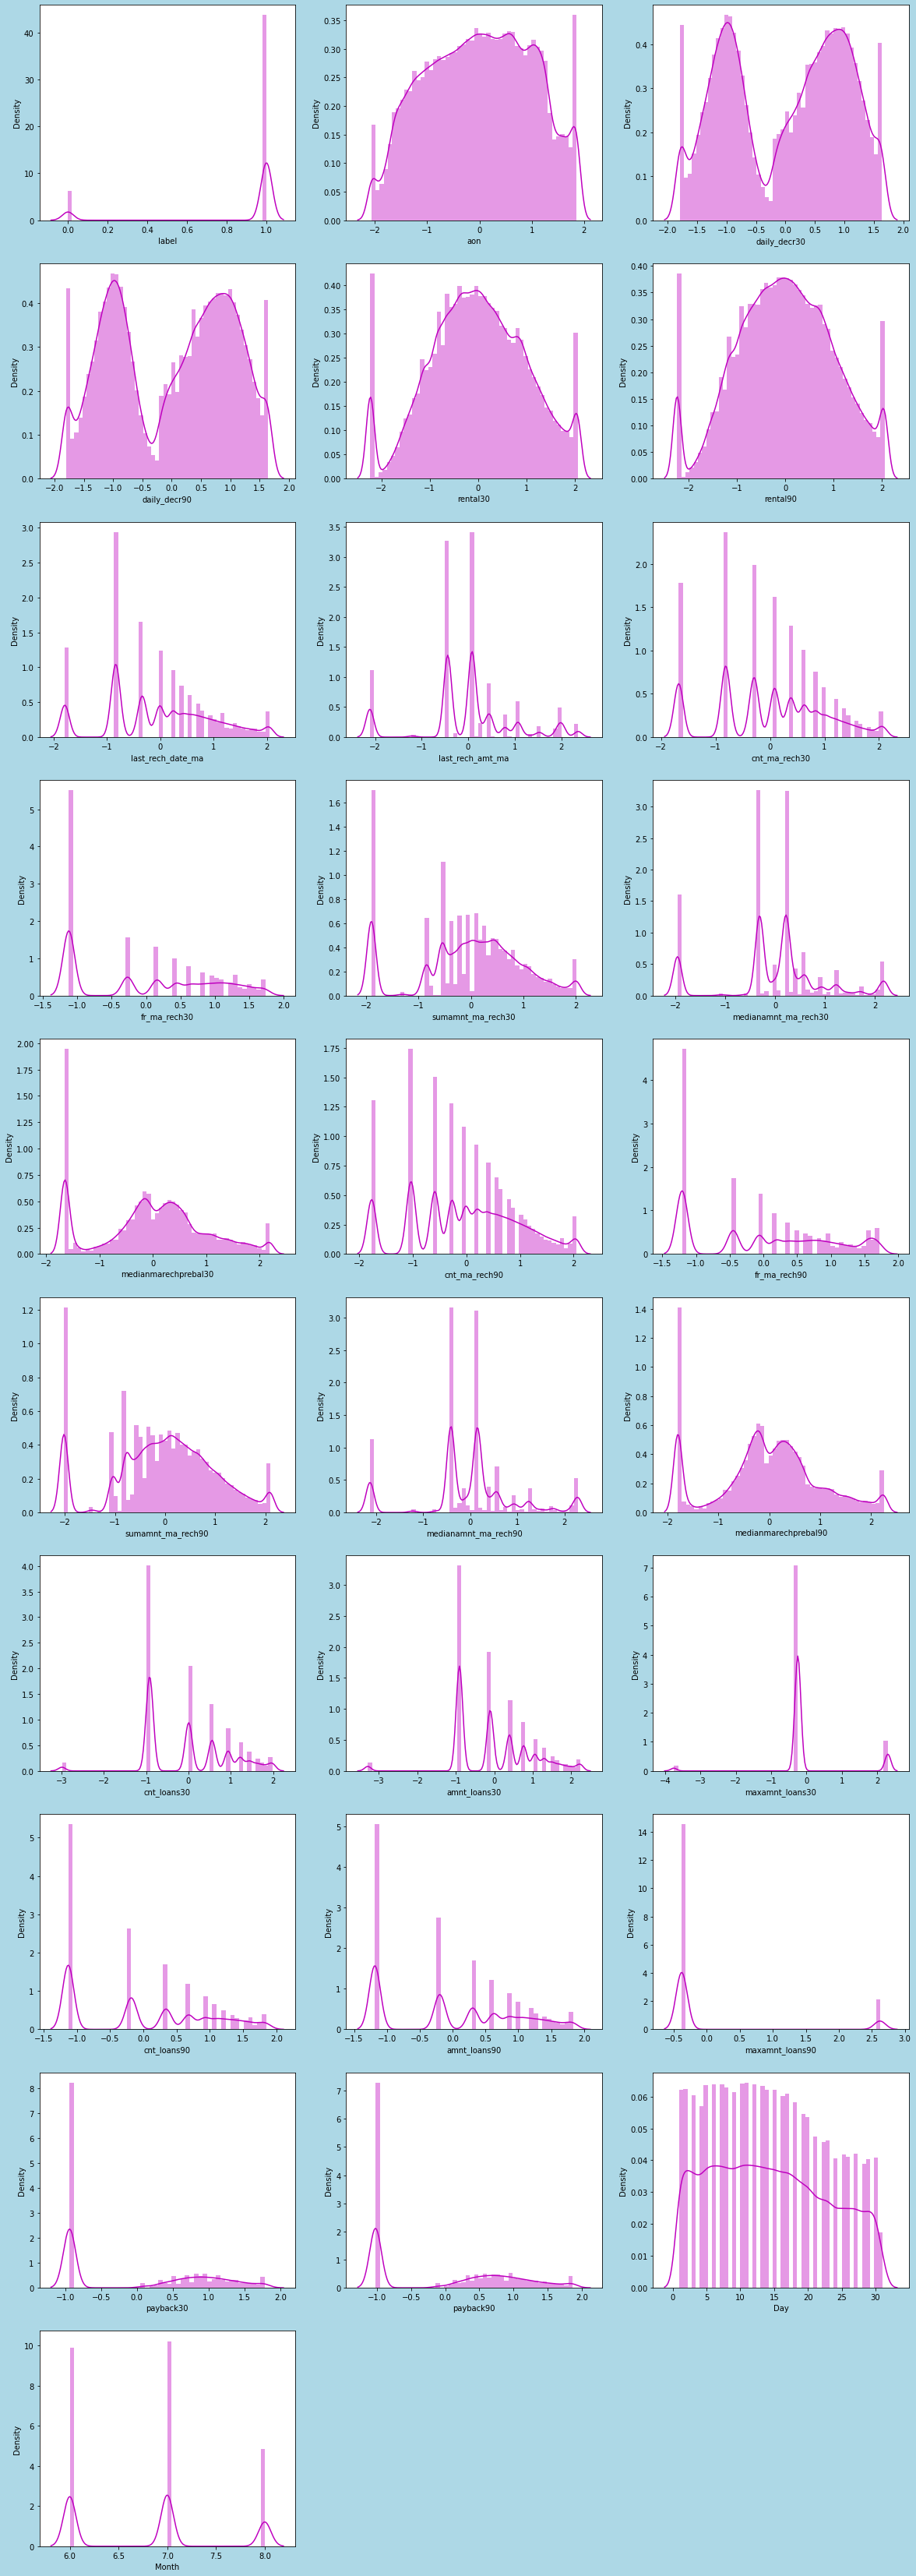

In [50]:
# ploting for numerical columns only
plt.figure(figsize = (20,60), facecolor = 'lightblue')
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(10,3,i[0]+1)
    sns.distplot(df[i[1]],color='m')
plt.show()

We can observe the skewness has almost been reduced in all the columns.
From the above dist plots we can see that the data has been distributes normally in some of the columns and the skewness is also reduced compared to the previous data.

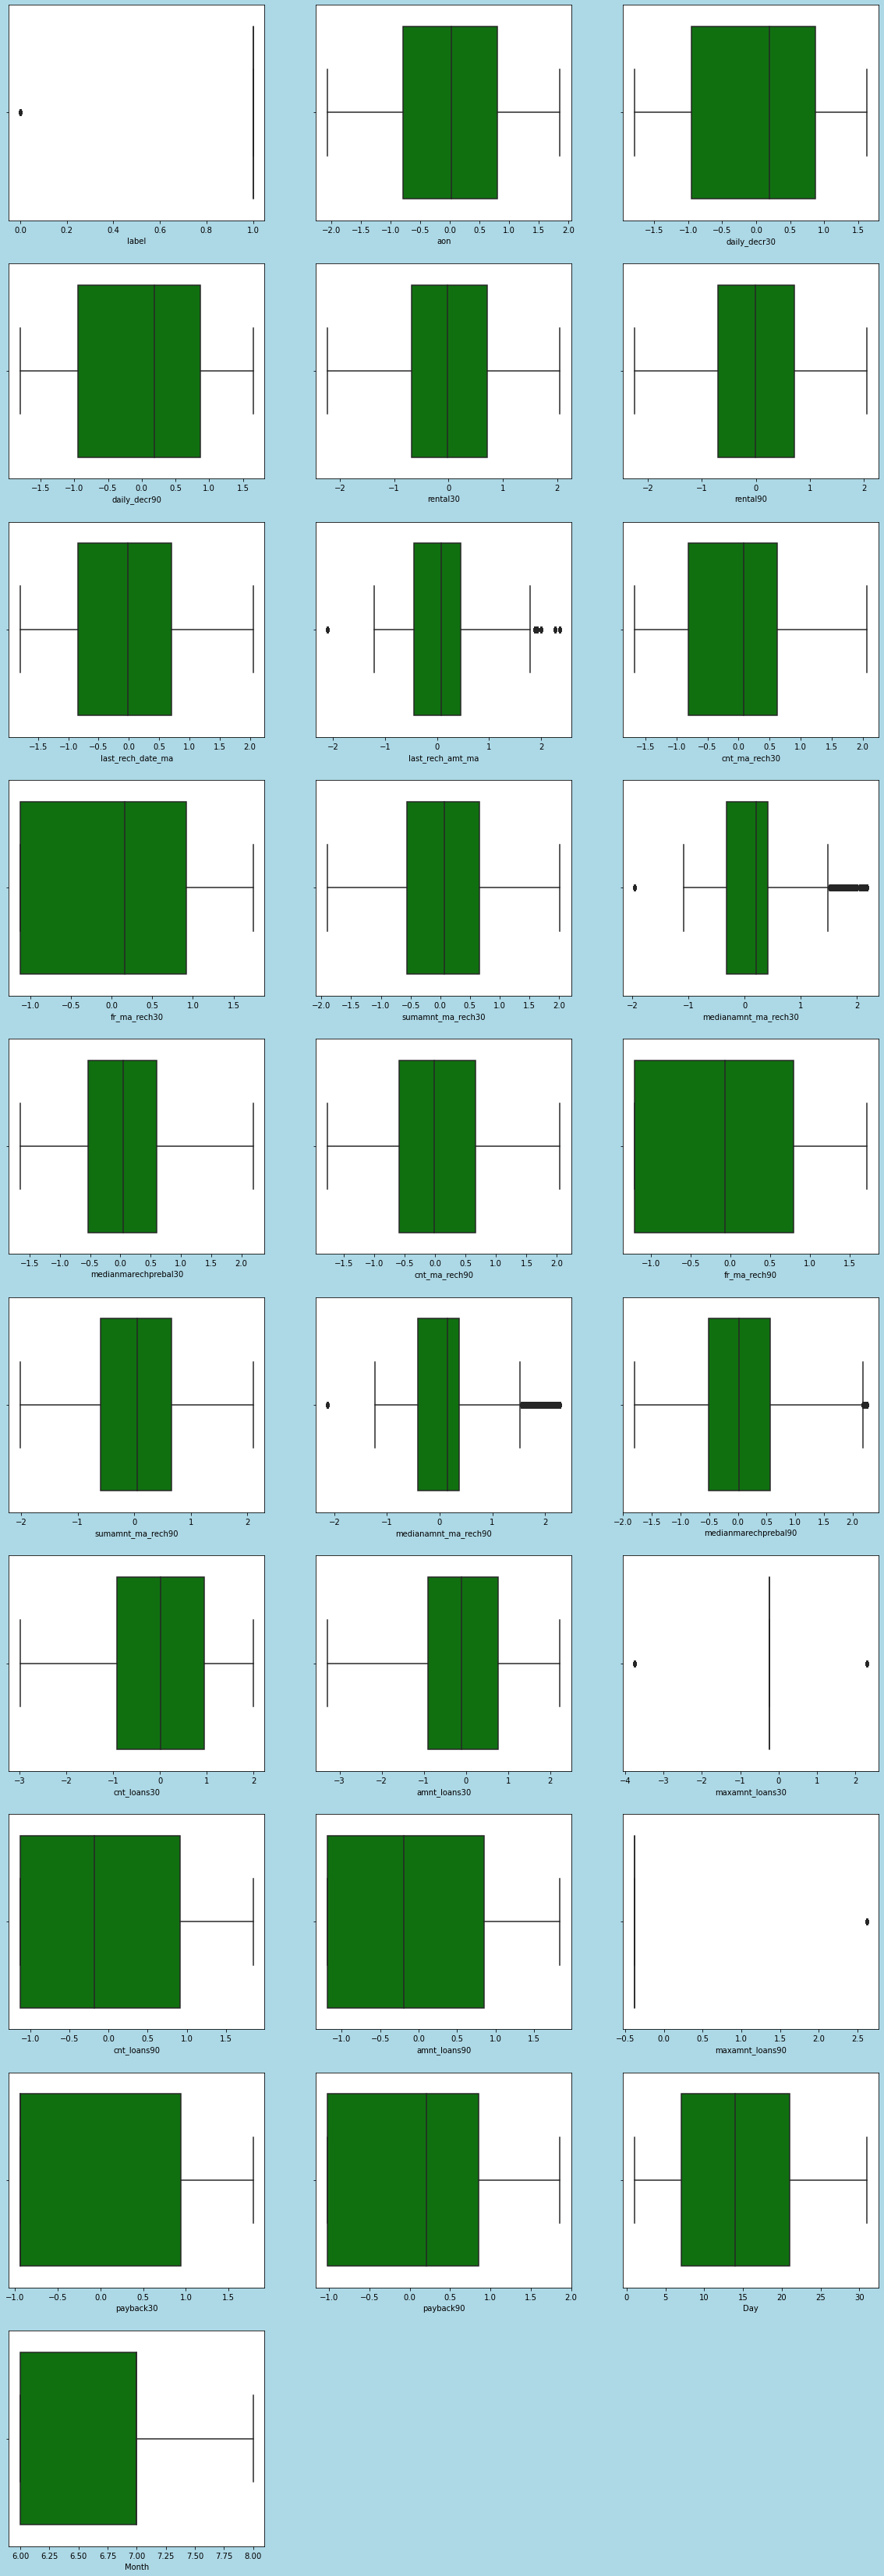

In [51]:
# Checking outliers
plt.figure(figsize = (20,60), facecolor = 'lightblue')
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(df[i[1]],color='g')
plt.show()

It's encouraging to observe that, following the use of the percentile approach and the removal of skewness, the outliers are nearly eliminated in many columns.

Following data cleaning, the whole dataset included solely numerical data. There is no need to encrypt the data because the dataset's characteristics are purely numerical.

# Correlation HeatMAP

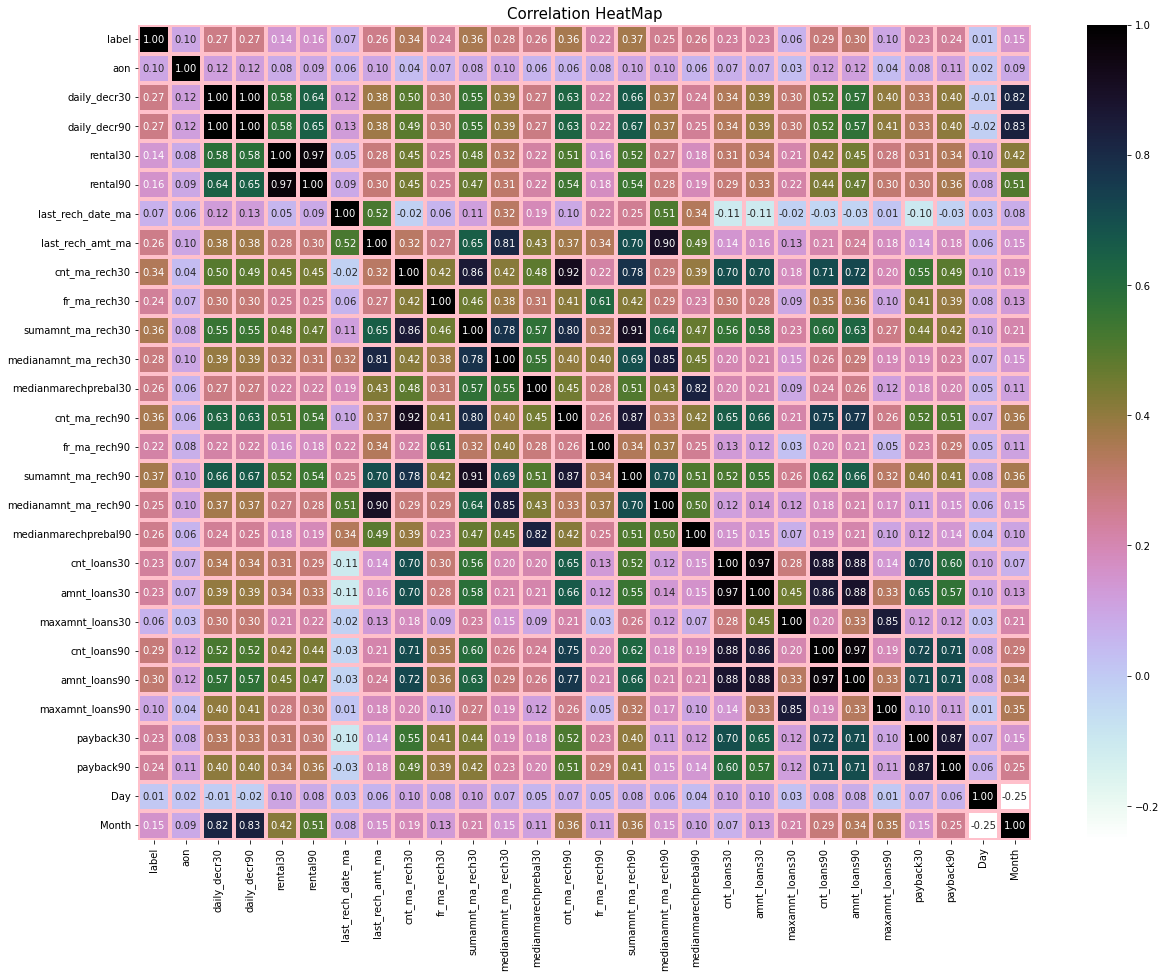

In [52]:
plt.figure (figsize = (20,15))
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(df.corr(), annot = True , linewidths = 4, linecolor='pink',fmt='.2f', cmap = 'cubehelix_r')
plt.show()

### Observation
- This heat map displays the data's correlation matrix.
- We can see how certain features relate to one another as well as how certain traits relate to labels.
- We can see that the relationship between the characteristics and the label in this case is weak.
- The label has a strong positive correlation with dark colors and a strong negative correlation with light shades.
- sumamnt ma rech30: The total recharge in the primary account during the last 30 days (in Indonasian Rupiah)
- sumamnt ma rech90 : Total recharges made to the primary account during the last 90 days (in Indonasian Rupiah)
- daily decr30: Average daily main account spending over the previous 30 days (in Indonasian Rupiah)
- daily decr90: Average daily main account spending over the previous 90 days (in Indonasian Rupiah)
- cnt ma rech30: number of main account recharges over the course of the previous 30 days 
- cnt ma rech90: The quantity of main account recharges during the previous 90 days.
- Number of loans taken by the user in the past 30 days and the past 90 days, respectively.
- Total amount of loans taken by user during the past 30 and 90 days, respectively.
- The label of defaulters and non-defaulters data has a somewhat good connection with these characteristics. Additionally, 
- We can see that there is no inverse relationship between the label and the characteristics. The majority of the characteristics are connected to one another.

# Checking correlation of all features with label

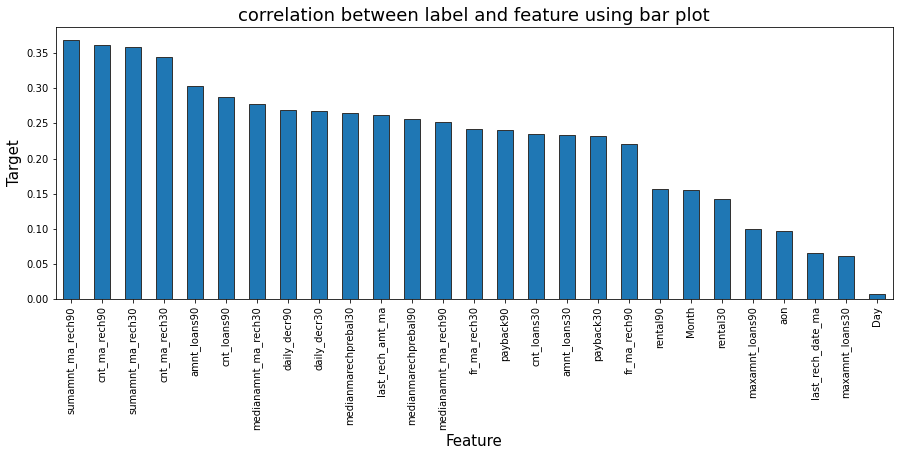

In [53]:
# Using Barplot to view Correlation of all features with label

plt.figure(figsize=(15,5))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',edgecolor=".2")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

The bar plot makes it easy to see how positively correlated the label and characteristics are. In this case, Day's correlation with the table is lower than it is in other cases. If required, we can remove these columns, but for the time being, let's leave them in.

# Separating feature and label into x and y respectively

In [54]:
x = df.drop("label", axis=1)
y = df["label"]

## Feature Scaling Using MinMaxScaler

In [55]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
0,0.349425,0.667277,0.658323,0.329366,0.334576,0.378059,0.490125,0.369059,0.990908,0.435822,...,0.602057,0.576109,0.579423,0.318179,0.327419,0.0,1.000000,0.985619,0.633333,0.5
1,0.625641,0.849843,0.832348,0.704536,0.667039,0.865438,0.813901,0.230201,0.000000,0.541325,...,0.416446,0.576109,1.000000,0.000000,0.327419,1.0,0.000000,0.000000,0.300000,1.0
2,0.537614,0.574922,0.568983,0.490537,0.469674,0.463357,0.490125,0.230201,0.000000,0.342065,...,0.416446,0.431350,0.579423,0.000000,0.000000,0.0,0.000000,0.000000,0.600000,1.0
3,0.318537,0.194126,0.195699,0.298441,0.289466,0.995899,0.405283,0.000000,0.000000,0.000000,...,0.602057,0.576109,0.579423,0.318179,0.327419,0.0,0.000000,0.000000,0.166667,0.0
4,0.718976,0.350200,0.350124,0.517269,0.494500,0.526030,0.573384,0.718284,0.448839,0.822577,...,0.924471,0.866709,0.579423,0.794324,0.778517,0.0,0.579532,0.502196,0.700000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.456175,0.350939,0.350850,0.516057,0.493376,0.248659,0.710749,0.469509,0.448839,0.660388,...,0.602057,0.576109,0.579423,0.318179,0.327419,0.0,0.378418,0.317350,0.533333,0.0
209589,0.762309,0.234462,0.235828,0.582034,0.554434,0.526030,0.374004,0.548546,0.298372,0.436507,...,0.713121,0.666725,0.579423,0.493926,0.493239,0.0,0.378418,0.317350,0.366667,0.0
209590,0.741859,0.846535,0.829869,0.788794,0.819283,0.463357,0.490125,0.613860,0.783051,0.636644,...,0.789124,0.866709,1.000000,0.747446,0.848522,1.0,0.704109,0.615380,0.933333,0.5
209591,0.936174,0.854085,0.837281,0.395469,0.480717,0.378059,0.374004,0.613860,0.616518,0.695870,...,0.602057,0.666725,1.000000,0.493926,0.599112,1.0,0.000000,0.823766,0.800000,0.5


## Oversampling of Data

In [56]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

Let's utilise the oversampling approach to balance the data as we have a problem with class imbalance in our datasets. 

In [57]:
# Importing SMOTE from over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

0    183431
1    183431
Name: label, dtype: int64


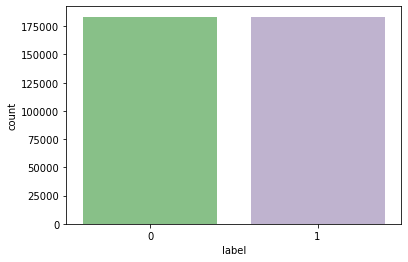

In [58]:
print (y.value_counts())
sns.countplot(y,palette="Accent")
plt.show()

We can now see that our data is balanced.
Following the use of oversampling, we are once more showing the values in our label column to cross-verify the revised data. Here, we see that the issue of class imbalance has been effectively rectified, and since all the categories now have the same data, the machine learning model is not biassed toward any one category.

# Getting best random state

In [59]:
# Importing DecisionTreeClassifier, train_test_split and accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9172447630599811  on Random_state  172


## Train_Test_Split

In [61]:
# Spliting data into train and test using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state = maxRS)

# Building Models
## Classicification problem
**DecisionTreeClassifier**

**RandomForestClassifier**

**ExtraTreesClassifier**

**GradientBoostingClassifier**

**BaggingClassifier**


In [62]:
# Importing required liabraries to run models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [63]:
# DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

DTC_score = accuracy_score(y_test, predDTC)*100
print("Accuracy Score: ", DTC_score)


roc_auc_score = roc_auc_score(y_test,predDTC)*100
print("\nroc_auc_score:", roc_auc_score)

conf_matrix = confusion_matrix(y_test, predDTC)
print("\nConfusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test,predDTC)
print("\nClassification Report:\n", class_report)


cv_score = (cross_val_score(DTC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Result = DTC_score - cv_score
print("\nDifferece between Accuracy Score and Cross Validation Score is ", Result)

Accuracy Score:  91.62498466738445

roc_auc_score: 91.6241154845031

Confusion Matrix:
 [[33846  2910]
 [ 3235 33382]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     36756
           1       0.92      0.91      0.92     36617

    accuracy                           0.92     73373
   macro avg       0.92      0.92      0.92     73373
weighted avg       0.92      0.92      0.92     73373

Cross Validation Score: 91.07976743550567

Differece between Accuracy Score and Cross Validation Score is  0.5452172318787802


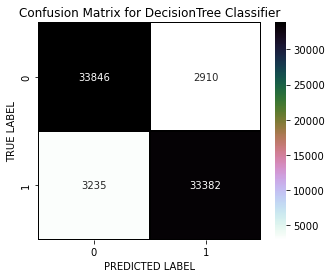

In [64]:
# let's plot confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,predDTC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="cubehelix_r",xticklabels=x_axis_labels,yticklabels=x_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for DecisionTree Classifier")
plt.show()

In [65]:
# RandomForestClassifier
RFC = RandomForestClassifier()

RFC.fit(x_train,y_train)

predRFC = RFC.predict(x_test)

RFC_score = accuracy_score(y_test, predRFC)*100
print("Accuracy Score: ", RFC_score)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predRFC)*100
print("\nroc_auc_score:", roc_auc_score)

conf_matrix = confusion_matrix(y_test, predRFC)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test,predRFC)
print("\nClassification Report:\n", class_report)

cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Result = RFC_score - cv_score
print("\nDifference between Accuracy Score and Cross Validation Score is ", Result)

Accuracy Score:  95.6210050018399

roc_auc_score: 95.6205064659855

Confusion Matrix:
 [[35243  1513]
 [ 1700 34917]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     36756
           1       0.96      0.95      0.96     36617

    accuracy                           0.96     73373
   macro avg       0.96      0.96      0.96     73373
weighted avg       0.96      0.96      0.96     73373

Cross Validation Score: 95.05537576752918

Difference between Accuracy Score and Cross Validation Score is  0.5656292343107197


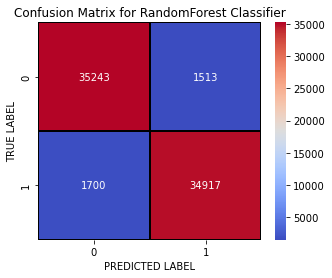

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_test,predRFC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=x_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for RandomForest Classifier")
plt.show()

In [67]:
# ExtraTreesClassifier
XT = ExtraTreesClassifier()

XT.fit(x_train,y_train)

predXT = XT.predict(x_test)

XT_score = accuracy_score(y_test, predXT)*100
print("Accuracy Score: ", XT_score)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predXT)*100
print("\nroc_auc_score:", roc_auc_score)


conf_matrix = confusion_matrix(y_test, predXT)
print("\nConfusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test,predXT)
print("\nClassification Report:\n", class_report)


cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Result = XT_score - cv_score
print("\nDifference between Accuracy Score and Cross Validation Score is ", Result)

Accuracy Score:  96.51234105188557

roc_auc_score: 96.50981115716792

Confusion Matrix:
 [[35964   792]
 [ 1767 34850]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     36756
           1       0.98      0.95      0.96     36617

    accuracy                           0.97     73373
   macro avg       0.97      0.97      0.97     73373
weighted avg       0.97      0.97      0.97     73373

Cross Validation Score: 96.41254940530813

Difference between Accuracy Score and Cross Validation Score is  0.09979164657744377


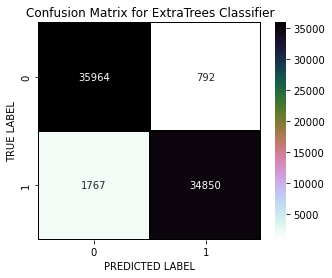

In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test,predXT)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="cubehelix_r",xticklabels=x_axis_labels,yticklabels=x_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for ExtraTrees Classifier")
plt.show()

In [69]:
# GradientBoostingClassifier
GB = GradientBoostingClassifier()


GB.fit(x_train,y_train)

predGB = GB.predict(x_test)

GB_score = accuracy_score(y_test, predGB)*100
print("Accuracy Score: ", GB_score)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predGB)*100
print("\nroc_auc_score:", roc_auc_score)

conf_matrix = confusion_matrix(y_test, predGB)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test,predGB)
print("\nClassification Report:\n", class_report)

cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Result = GB_score - cv_score
print("\nDifference between Accuracy Score and Cross Validation Score is ", Result)

Accuracy Score:  90.42563340738418

roc_auc_score: 90.42349994024644

Confusion Matrix:
 [[33650  3106]
 [ 3919 32698]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     36756
           1       0.91      0.89      0.90     36617

    accuracy                           0.90     73373
   macro avg       0.90      0.90      0.90     73373
weighted avg       0.90      0.90      0.90     73373

Cross Validation Score: 89.69913485787171

Difference between Accuracy Score and Cross Validation Score is  0.7264985495124705


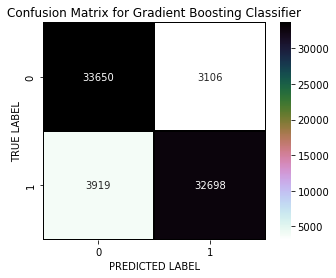

In [70]:
# Confusion Matrix
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="cubehelix_r",xticklabels=x_axis_labels,yticklabels=x_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

In [72]:
# BaggingClassifier
BC = BaggingClassifier()

BC.fit(x_train,y_train)

predBC = BC.predict(x_test)

BC_score = accuracy_score(y_test, predBC)*100
print("Accuracy Score: ", XT_score)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predBC)*100
print("\nroc_auc_score:", roc_auc_score)

conf_matrix = confusion_matrix(y_test, predBC)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test,predBC)
print("\nClassification Report:\n", class_report)

cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Result = BC_score - cv_score
print("\nAccuracy Score - Cross Validation Score is ", Result)

Accuracy Score:  96.51234105188557

roc_auc_score: 94.4903539880258

Confusion Matrix:
 [[35152  1604]
 [ 2437 34180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     36756
           1       0.96      0.93      0.94     36617

    accuracy                           0.94     73373
   macro avg       0.95      0.94      0.94     73373
weighted avg       0.95      0.94      0.94     73373

Cross Validation Score: 93.7646988624155

Accuracy Score - Cross Validation Score is  0.7278256356968882


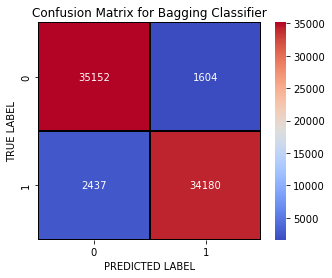

In [73]:
#Confusion Matrix
cm = confusion_matrix(y_test,predBC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=x_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Bagging Classifier")
plt.show()

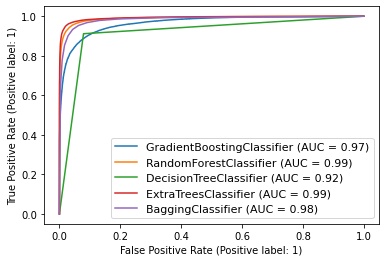

In [74]:
# ROC CURVE of all models
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(GB , x_test, y_test)
plot_roc_curve(RFC , x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC , x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT , x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC , x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Hyper Parameter Tuning

In [75]:
# Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Gradient Boosting Classifier
parameters = {'max_depth' : [3,6,9],
              'max_features' : ['auto','sqrt','log2'],
              'learning_rate' : [0.1,0.25,0.5],
              'min_samples_leaf' : [1,50,100]}

In [76]:
RCV=RandomizedSearchCV(GradientBoostingClassifier(),parameters,cv=5,n_iter =10)

In [77]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5],
                                        'max_depth': [3, 6, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 50, 100]})

In [78]:
RCV.best_params_

{'min_samples_leaf': 100,
 'max_features': 'log2',
 'max_depth': 9,
 'learning_rate': 0.25}

In [81]:
# creating final model
MicroCredit_model = GradientBoostingClassifier(min_samples_leaf = 100, max_features = "log2", max_depth = 9, learning_rate = 0.25)
MicroCredit_model.fit(x_train,y_train)
pred = MicroCredit_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score for the Best Model is: ", acc_score*100)

Accuracy score for the Best Model is:  94.82098319545337


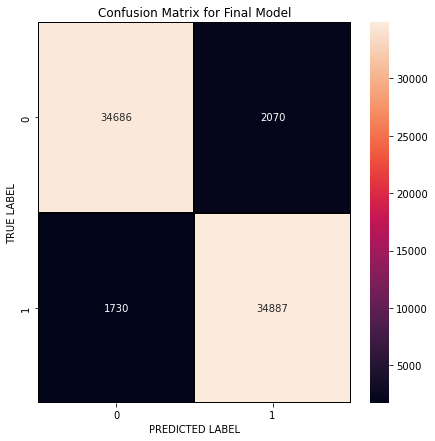

In [82]:
# let's plot confusion matrix for FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Final Model")
plt.show()

We may view actual and anticipated values for the final model with the aid of the confusion matrix. Additionally, we can see how frequently we received accurate results and how frequently my model failed to make the right forecast.

# Plotting ROC and Compare AUC for the Final Model

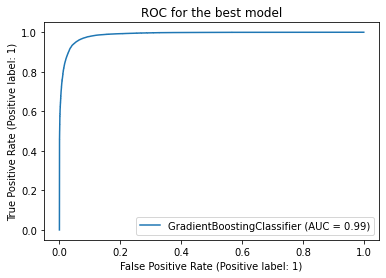

In [83]:
# let's check the AUC for the best model after Hyper Parameter Tuning

plot_roc_curve(MicroCredit_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

The AUC score for our final model, which was enhanced after the model was tuned, is shown to be 99% on the ROC Curve that we have developed.

# Saving The Model

In [84]:
#Saving model
import joblib
joblib.dump(MicroCredit_model,"Micro_Credit_Loan_Defaulter.pkl")

['Micro_Credit_Loan_Defaulter.pkl']

In [85]:
# Loading the saved model
model = joblib.load("Micro_Credit_Loan_Defaulter.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [88]:
# Creating dataframe for predicted results
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,73363,73364,73365,73366,73367,73368,73369,73370,73371,73372
Predicted,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
Original,0,1,0,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1


Implementing a categorization model. We have the expected values for defaulters and non-defaulters of microcredit loans.
We can see from the forecasts that the actual and expected numbers are almost identical.